<img style="float: right; margin: 0px 0px 15px 15px;" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSQt6eQo8JPYzYO4p6WmxLtccdtJ4X8WR6GzVVKbsMjyGvUDEn1mg" width="300px" height="100px" />

# Valuación de Opciones por Monte-Carlo

## Introducción a las Opciones

Un derivado es un instrumento flnanciero cuyo rendimiento depende de otro bien o activo se conoce como subyacente.

Una opción es un contrato entre dos personas para adquirir o vender un bieno un activo llamado subyacente a un precio y en una fecha fljados de antemano. A la fecha se le llama fecha de maduración y al precio se le conoce como precio de ejercicio o "strike price".

- Una opción de compra **"call"** permite a su propietario comprar el activo subyacente al precio de ejercicio  antes o en la fecha de vencimiento.

- Una opción de venta **"put"** le permite a su propietario vender el activo subyacente al precio de ejercicio antes o en la fecha de vencimiento

1. En una opción siempre hay dos partes: por un lado, quien compra la opción y por otro quien la suscribe.
2. El primero adquiere el derecho, pero no la obligacióon, de ejercer la opción en la fecha de maduración.
3. En cambio, la contra-parte se obliga a cumplir el contrato, independientemente de lo que convenga a sus intereses.
4. Para compensar esta asimetría y que el contrato sea justo para ambas partes, quien compra la opción le paga a quien la suscribe una **prima** que le permita cubrirse contra futuras pérdidas, debidas al cambio de precio del subyacente durante la vigencia de la opción.

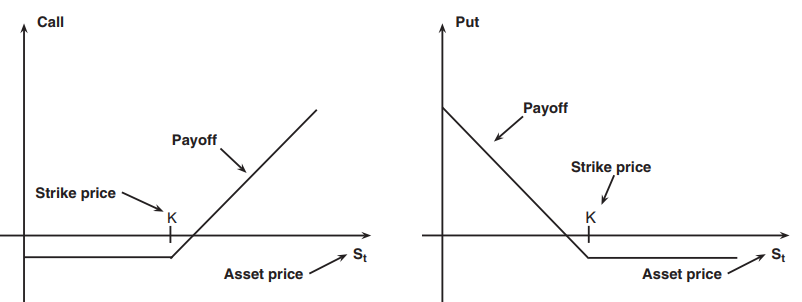

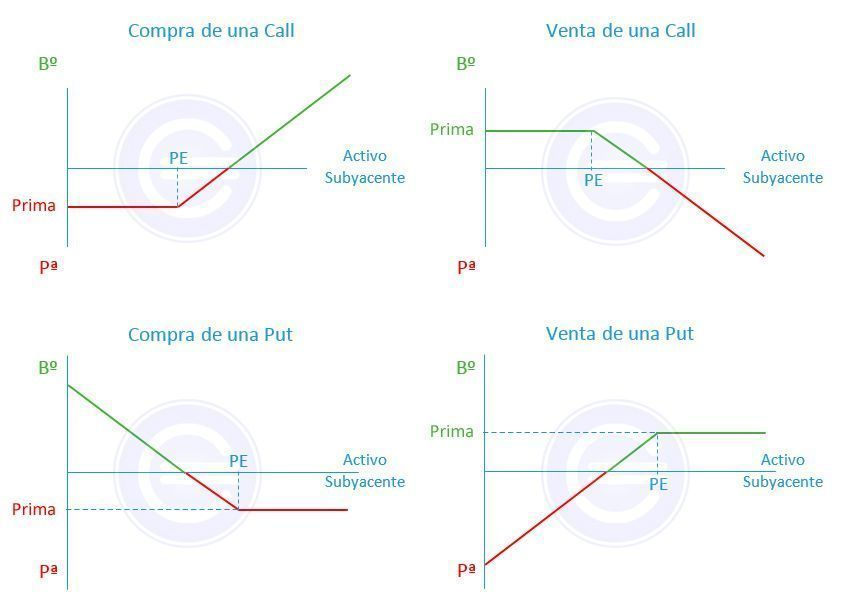

Una opción puede negociarse en el mercado secundario por lo que es importante determinar su valor $V_t$ para cada tiempo $t\in [0, T]$. La ganancia que obtiene quién adquiere la opción se llama función de pago o "payoff" y claramente depende del valor del subyacente. 

Hay una gran variedad de opciones en el mercado y éstas se clasiflcan según su función de pago y la forma en que pueden ejercerse.  Las opciones que tienen como función de pago a
$$ P(S(t),t)=max\{S(T)-K,0\} \rightarrow \text{En el caso de Call}$$ 
$$ P(S(t),t)=max\{K-S(T),0\} \rightarrow \text{En el caso de Put}$$ 
se llaman opciones **Vainilla**, con $h:[0,\infty) \to [0,\infty)$.

La opción se llama **europea** si puede ejercerse sólo en la fecha de vencimiento.

Se dice que una opción es **americana** si puede ejercerse en cualquier momento antes o en la fecha de vencimiento.

Una opción compleja popular son las llamadas **opciones asiáticas** cuyos pagos dependen de todas las trayectorias del precio de los activos subyacentes. Las opciones cuyos pagos dependen de las trayectorias de los precios de los activos subyacentes se denominan opciones dependientes de la ruta.



Antes de empezar a evaluar y explicar todos los diferentes tipos de opciones recordemos un poco de el curso de procesos estocásticos

## Repaso curso procesos estocásticos

De la teoría del cálculo estocástico, se demostró que un proceso aleatorio puede ser descrito por la siguiente ecuación:

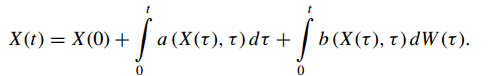

O en un intervalo infinitesimal, se puede reescribir en una forma diferencial como:
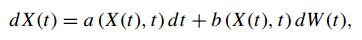

donde $a(X (t), t)$ y $b (X (t), t)$ son respectivamente la media instantánea y la desviación estándar instantánea. Estos parámetros generalmente dependen del pasado y de la trayectoria del proceso.

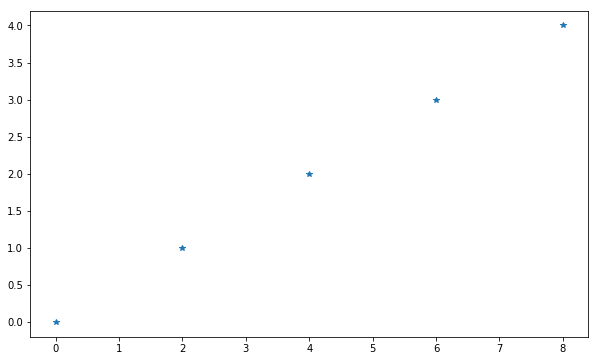

In [11]:
# Brownian motion 
import numpy as np
import matplotlib.pyplot as plt
g = lambda t: int(t/deltaT)
deltaT = 2
t = np.arange(0,10,deltaT)
plt.figure(figsize=(10,6))
plt.plot(t,[g(ti) for ti in t],'*')
plt.show()

## Lema de Ito
Sea $X$ sea un proceso unidimensional definido como:
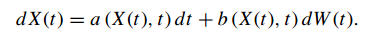

Sea $Y (t) = g (t, X (t))$ donde $g$ es dos veces continuamente diferenciable.

Suponemos que a, b y g son transformaciones sin memoria, es decir, no contienen información (memoria) de realizaciones anteriores de la variable aleatoria X.

*$a$ representa la deriva o tendencia y *b* el coeficiente de difusión o la volatilidad.*

Usando la expansión de la serie Taylor para $g (t, X (t))$ y haciendo manipulaciones algebraicas obtenemos el lema de ito

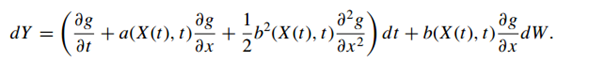

Vimos que el modelo clásico para representar la variación en los valores de los activos financieros tiene la forma:
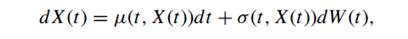

## Opciones Plan Vainilla: opción de compra y opción de venta europea

Una opción vainilla o estándar es una opción normal de compra o venta que no tiene características especiales o inusuales. Puede ser para tamaños y vencimientos estandarizados, y negociarse en un intercambio.
En comparación con otras estructuras de opciones, las opciones de vanilla no son sofisticadas o complicadas.

### Para efectos de simulación

Se asume que el activo $S(t)$ sigue la ecuación diferencial estocástica (Movimiento Browniano Geométrico)

$$ dS(t) = rS(t)dt +\sigma S(t) d\tilde W $$

donde $\tilde W$ es el movimiento browniano bajo la probabilidad de riesgo neutro.


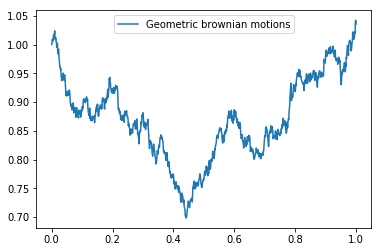

In [59]:
import numpy as np
import matplotlib.pyplot as plt

p = 1
N = 1000
S0 = 1
mu = 0.03
sigma = 0.2
nu = mu-(sigma**2)/2

x = np.zeros([N+1,p])
t = np.asmatrix(np.arange(0,1+1/N,1/N)).T
# t = np.arange(0,1+1/N,1/N)
Z = np.random.randn(N,p)

x[1:] = np.cumsum(Z,axis=0)/np.sqrt(N)
y = S0*np.exp(nu*t+sigma*x)

plt.plot(t,y,label='Geometric brownian motions')
# plt.plot(t,x,label='Brownian motions')
plt.legend()
plt.show()


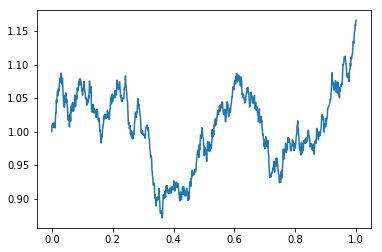

In [60]:
T = 1
NbTraj = 1
NbStep = 1000
S0 = 1
mu = 0.03
sigma = 0.2
nu = mu-(sigma**2)/2

DeltaT = 1/NbStep
SqDeltaT = np.sqrt(DeltaT)

#for i in range(NbStep):
DeltaW = SqDeltaT*np.random.randn(NbTraj,NbStep)
increments = nu*DeltaT + sigma*DeltaW
concat = np.concatenate((np.log(S0)*np.ones([NbTraj,1]),increments),axis=1)
LogSt = np.cumsum(concat,axis=1)
St = np.exp(LogSt)

t = np.arange(0,1+DeltaT,DeltaT)
plt.plot(t,St.T)
plt.show()

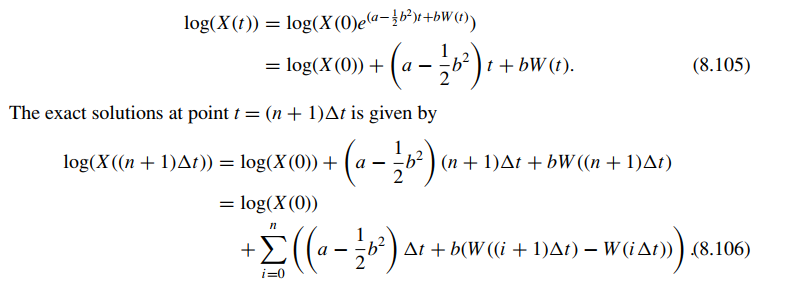

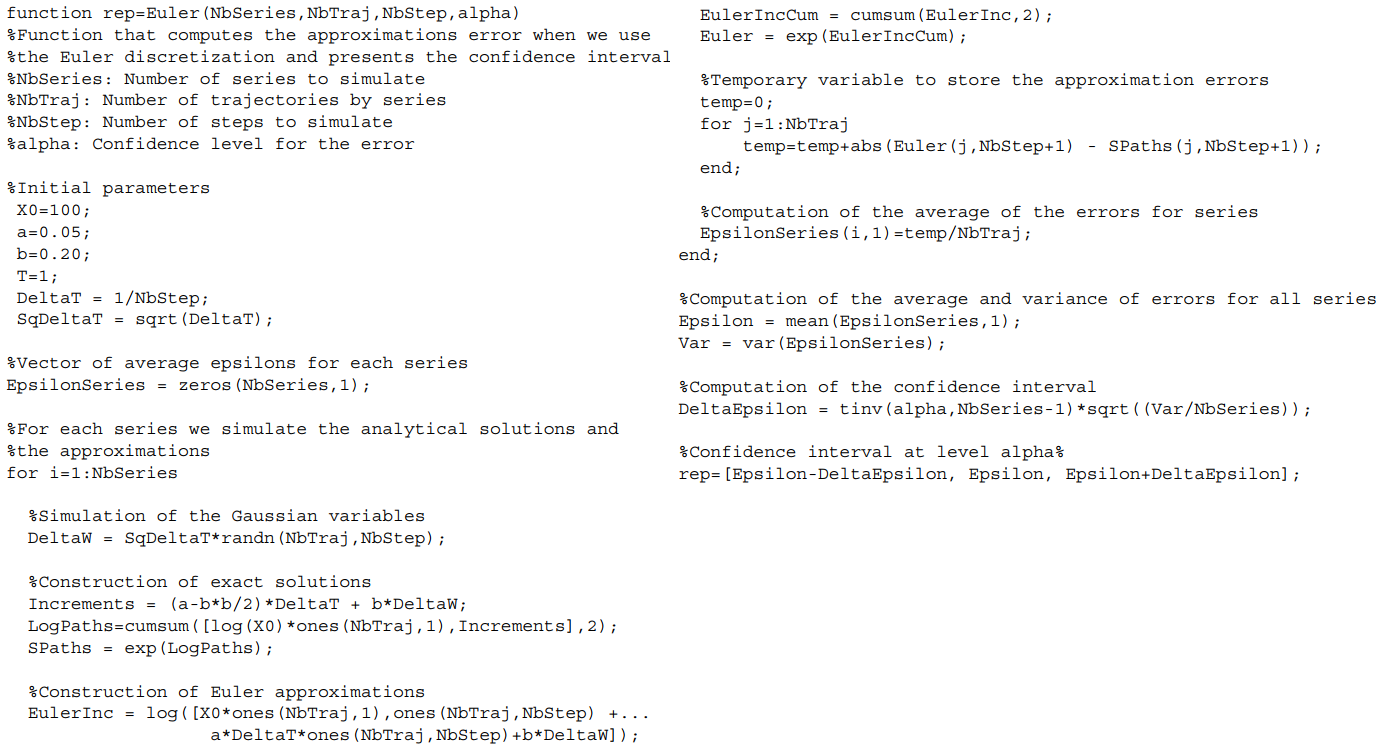

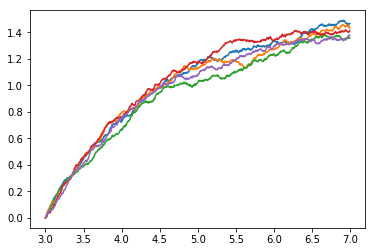

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import matplotlib.pyplot as plt

num_sims = 5 ### display five runs
t_init = 3
t_end  = 7
N      = 1000 ### Compute 1000 grid points
dt     = float(t_end - t_init) / N 
y_init = 0
c_theta = 0.7
c_mu    = 1.5
c_sigma = 0.06

def mu(y, t): 
    """Implement the Ornstein–Uhlenbeck mu.""" ## = \theta (\mu-Y_t)
    return c_theta * (c_mu - y)

def sigma(y, t): 
    """Implement the Ornstein–Uhlenbeck sigma.""" ## = \sigma
    return c_sigma

def dW(delta_t): 
    """Sample a random number at each call."""
    return np.random.normal(loc = 0.0, scale = np.sqrt(delta_t))

ts    = np.arange(t_init, t_end, dt)
ys    = np.zeros(N)
ys[0] = y_init

for _ in range(num_sims):
    for i in range(1, ts.size):
        t = (i-1) * dt
        y = ys[i-1]
        ys[i] = y + mu(y, t) * dt + sigma(y, t) * dW(dt)
    plt.plot(ts, ys)
plt.show()

#https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method

<script>
  $(document).ready(function(){
    $('div.prompt').hide();
    $('div.back-to-top').hide();
    $('nav#menubar').hide();
    $('.breadcrumb').hide();
    $('.hidden-print').hide();
  });
</script>

<footer id="attribution" style="float:right; color:#808080; background:#fff;">
Created with Jupyter by Oscar David Jaramillo Zuluaga.
</footer>